# Mobina Pournemat

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.image import adjust_brightness
import matplotlib.pyplot as plt
from tensorflow import keras
import scipy.io as sio
import pandas as pd
import numpy as np
import tensorflow
import cv2

## Load data

In [ ]:
!wget https://warwick.ac.uk/fac/cross_fac/tia/data/hovernet/consep.zip

--2021-09-03 05:44:13--  https://warwick.ac.uk/fac/cross_fac/tia/data/hovernet/consep.zip
Resolving warwick.ac.uk (warwick.ac.uk)... 137.205.28.41
Connecting to warwick.ac.uk (warwick.ac.uk)|137.205.28.41|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 153334740 (146M) [application/zip]
Saving to: ‘consep.zip’

consep.zip          100%[===================>] 146.23M  11.5MB/s    in 25s     

2021-09-03 05:44:39 (5.82 MB/s) - ‘consep.zip’ saved [153334740/153334740]



In [ ]:
!unzip consep.zip -d imgData

Archive:  consep.zip
   creating: imgData/CoNSeP/
  inflating: imgData/CoNSeP/.DS_Store  
   creating: imgData/__MACOSX/
   creating: imgData/__MACOSX/CoNSeP/
  inflating: imgData/__MACOSX/CoNSeP/._.DS_Store  
   creating: imgData/CoNSeP/Test/
  inflating: imgData/CoNSeP/Test/.DS_Store  
   creating: imgData/__MACOSX/CoNSeP/Test/
  inflating: imgData/__MACOSX/CoNSeP/Test/._.DS_Store  
   creating: imgData/CoNSeP/Test/Images/
  inflating: imgData/CoNSeP/Test/Images/test_14.png  
   creating: imgData/__MACOSX/CoNSeP/Test/Images/
  inflating: imgData/__MACOSX/CoNSeP/Test/Images/._test_14.png  
  inflating: imgData/CoNSeP/Test/Images/test_9.png  
  inflating: imgData/__MACOSX/CoNSeP/Test/Images/._test_9.png  
  inflating: imgData/CoNSeP/Test/Images/test_8.png  
  inflating: imgData/__MACOSX/CoNSeP/Test/Images/._test_8.png  
  inflating: imgData/CoNSeP/Test/Images/test_12.png  
  inflating: imgData/__MACOSX/CoNSeP/Test/Images/._test_12.png  
  inflating: imgData/CoNSeP/Test/Images/test_13.p

In [ ]:
!ls imgData/CoNSeP/Train/Images| wc -l

27


In [ ]:
!ls imgData/CoNSeP/Train/Labels| wc -l

27


In [ ]:
!ls imgData/CoNSeP/Train/Overlay| wc -l

27


In [ ]:
training_size = 27

In [ ]:
!ls imgData/CoNSeP/Test/Images| wc -l

14


In [ ]:
!ls imgData/CoNSeP/Test/Labels| wc -l

14


In [ ]:
!ls imgData/CoNSeP/Test/Overlay| wc -l

14


In [ ]:
test_size = 14

As shown, the training set has 27 and the test set has 14 images.

## Preprocessing

#### Shape of train set

In [ ]:
train_img = cv2.imread('imgData/CoNSeP/Train/Images/train_1.png')
print(f'training images shape: {train_img.shape}')

train_label = sio.loadmat('imgData/CoNSeP/Train/Labels/train_1.mat')
print('training labels shape:', train_label['type_map'].shape)

train_overlay = cv2.imread('imgData/CoNSeP/Train/Overlay/train_1.png')
print(f'training overlay shape: {train_overlay.shape}') 

training images shape: (1000, 1000, 3)
training labels shape: (1000, 1000)
training overlay shape: (1000, 1000, 3)


#### Shape of test set

In [ ]:
test_img = cv2.imread('imgData/CoNSeP/Test/Images/test_1.png')
print(f'test data shape: {test_img.shape}') 

test_label = sio.loadmat('imgData/CoNSeP/Test/Labels/test_1.mat')
print('test labels shape:', test_label['type_map'].shape)

test_overlay = cv2.imread('imgData/CoNSeP/Test/Overlay/test_1.png')
print(f'test overlay shape: {test_overlay.shape}') 

test data shape: (1000, 1000, 3)
test labels shape: (1000, 1000)
test overlay shape: (1000, 1000, 3)


### Image to Array

In [ ]:
size = 640

#### Train

##### Images

In [ ]:
training_imgs = []
training_imgs_shape = []
for i in range(1, training_size+1):
    address = f'imgData/CoNSeP/Train/Images/train_{str(i)}.png'
    img = cv2.imread(address)
    training_imgs.append(img)
    training_imgs_shape.append(img.shape)

In [ ]:
X_train = np.array(training_imgs)
X_train.shape

(27, 1000, 1000, 3)

In [ ]:
shape_counter = {}
for s in training_imgs_shape:
    shape_counter[s] = shape_counter.get(s, 0) + 1

shape_counter

{(1000, 1000, 3): 27}

In [ ]:
X_train = np.array([cv2.resize(img, (size, size)) for img in X_train])
X_train.shape

(27, 640, 640, 3)

Normalization (by dividing to 255) gets worse result!!

In [ ]:
# X_train_n = X_train / 255.

##### Labels

In [ ]:
training_labels = []
training_labels_shape = []
for i in range(1, training_size+1):
    address = f'imgData/CoNSeP/Train/Labels/train_{str(i)}.mat'
    label = sio.loadmat(address)['type_map']
    training_labels.append(label)
    training_labels_shape.append(label.shape)

In [ ]:
y_train = np.array(training_labels)
y_train.shape

(27, 1000, 1000)

In [ ]:
# check all labels size to be the same
shape_counter = {}
for s in training_labels_shape:
    shape_counter[s] = shape_counter.get(s, 0) + 1

shape_counter

{(1000, 1000): 27}

In [ ]:
Y_train = to_categorical(y_train)
Y_train.shape

(27, 1000, 1000, 8)

In [ ]:
Y_train = np.array([cv2.resize(img, (size, size)) for img in Y_train])

In [ ]:
Y_train.shape

(27, 640, 640, 8)

##### Overlays

In [ ]:
training_overlays = []
training_overlays_shape = []
for i in range(1, training_size+1):
    address = f'imgData/CoNSeP/Train/Overlay/train_{str(i)}.png'
    img = cv2.imread(address)
    training_overlays.append(img)
    training_overlays_shape.append(img.shape)

In [ ]:
XY_train = np.array(training_overlays)
XY_train.shape

(27, 1000, 1000, 3)

In [ ]:
# check all labels size to be the same
shape_counter = {}
for s in training_overlays_shape:
    shape_counter[s] = shape_counter.get(s, 0) + 1

shape_counter

{(1000, 1000, 3): 27}

In [ ]:
XY_train = np.array([cv2.resize(img, (size, size)) for img in XY_train])

#### Test

##### Images

In [ ]:
test_imgs = []
test_imgs_shape = []
for i in range(1, test_size+1):
    address = f'imgData/CoNSeP/Test/Images/test_{str(i)}.png'
    img = cv2.imread(address)
    test_imgs.append(img)
    test_imgs_shape.append(img.shape)

In [ ]:
X_test = np.array(test_imgs)
X_test.shape

(14, 1000, 1000, 3)

In [ ]:
# check all labels size to be the same
shape_counter = {}
for s in test_imgs_shape:
    shape_counter[s] = shape_counter.get(s, 0) + 1

shape_counter

{(1000, 1000, 3): 14}

In [ ]:
X_test = np.array([cv2.resize(img, (size, size)) for img in X_test])

As said before, the normalization didn't work in this case.

In [ ]:
# X_test_n = X_test / 255.

##### Labels

In [ ]:
test_labels = []
test_labels_shape = []
for i in range(1, test_size+1):
    address = f'imgData/CoNSeP/Test/Labels/test_{str(i)}.mat'
    label = sio.loadmat(address)['type_map']
    test_labels.append(label)
    test_labels_shape.append(label.shape)

In [ ]:
y_test = np.array(test_labels)
y_test.shape

(14, 1000, 1000)

In [ ]:
# check all labels size to be the same
shape_counter = {}
for s in test_labels_shape:
    shape_counter[s] = shape_counter.get(s, 0) + 1

shape_counter

{(1000, 1000): 14}

In [ ]:
Y_test = to_categorical(y_test)

In [ ]:
Y_test = np.array([cv2.resize(img, (size, size)) for img in Y_test])
Y_test.shape

(14, 640, 640, 8)

##### Overlays

In [ ]:
test_overlays = []
test_overlays_shape = []
for i in range(1, test_size+1):
    address = f'imgData/CoNSeP/Test/Overlay/test_{str(i)}.png'
    img = cv2.imread(address)
    test_overlays.append(img)
    test_overlays_shape.append(img.shape)

In [ ]:
XY_test = np.array(test_overlays)
XY_test.shape

(14, 1000, 1000, 3)

In [ ]:
# check all labels size to be the same
shape_counter = {}
for s in test_overlays_shape:
    shape_counter[s] = shape_counter.get(s, 0) + 1

shape_counter

{(1000, 1000, 3): 14}

In [ ]:
XY_test = np.array([cv2.resize(img, (size, size)) for img in XY_test])
XY_test.shape

(14, 640, 640, 3)

### Augmentation methods




- Color space transformations : change RGB color channels, intensify any color
- Kernel filters : sharpen, blur the image 
Random Erasing – remove a part of the image
- Geometric transformations : flip, crop, rotate, shift, brightness, zoom randomly
- Mixing images : combine images together.

in this case, because of imbalancy of dataset, we couldn't use the Image Generator module. Moreover, i thought that some augmentations are not useful here, such as flip, rotation, etc. but the brightness changing can help. 


In [ ]:
X_train_ = X_train
Y_train_ = Y_train
for i in range(training_size):
    X_train_ = np.append(X_train_, [adjust_brightness(X_train[i], delta=0.4), adjust_brightness(X_train[i], delta=-0.4)], axis=0)
    X_train_ = np.append(X_train_, [adjust_brightness(X_train[i], delta=0.2), adjust_brightness(X_train[i], delta=-0.3)], axis=0)
    Y_train_ = np.append(Y_train_, [Y_train[i], Y_train[i], Y_train[i], Y_train[i]], axis=0)

### Visualize data

#### Train

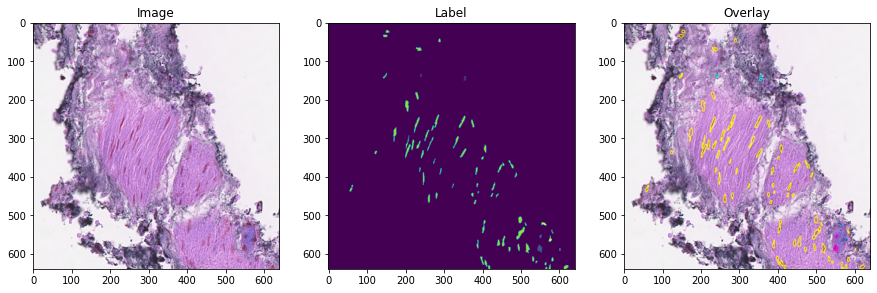

In [ ]:
i = 3
plt.figure(figsize=(15, 45))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(X_train[i])

plt.subplot(1, 3, 2)
plt.title("Label")
plt.imshow(np.argmax(Y_train[i], axis=2))

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(XY_train[i])

#### Test

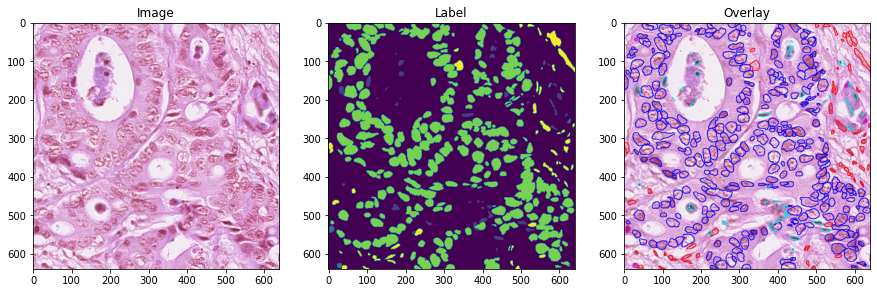

In [ ]:
i = 3
plt.figure(figsize=(15, 45))

plt.subplot(1, 3, 1)
plt.title("Image")
plt.imshow(X_test[i])

plt.subplot(1, 3, 2)
plt.title("Label")
plt.imshow(np.argmax(Y_test[i], axis=2))

plt.subplot(1, 3, 3)
plt.title("Overlay")
plt.imshow(XY_test[i])

### Validation split

With separating validation data the model gets weaker so i didn't split train data to train and test.

In [ ]:
# X_train_, X_val, Y_train_, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

## Install requirements

In [ ]:
import segmentation_models as sm
!pip install segmentation_models

Segmentation Models: using `keras` framework.


In [ ]:
!pip install -U albumentations>=0.3.0 --user 
!pip install -U --pre segmentation-models --user

In [ ]:
sm.set_framework('tf.keras')

## Model 

#### Load pre-trained model

Preprocessing function gets the model weaker. so I don't use it.

In [ ]:
# preprocess input
# X_train = preprocess_input(X_train)
# X_train_ = preprocess_input(X_train_)
# X_val = preprocess_input(X_val)

In [ ]:
BACKBONE = 'efficientnetb3'

model = sm.Unet('efficientnetb3', classes=8, activation='softmax', input_shape=(None, None, 3))

model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score, sm.metrics.FScore()],
)

44122112/44107200 [==============================] - 2s 0us/step


#### The Last layer training

In [ ]:
model.fit(
    X_train_,
    Y_train_,
    batch_size=2,
    epochs=40
)

Epoch 1/40
68/68 [==============================] - 138s 1s/step - loss: 1.2341 - iou_score: 0.0966 - f1-score: 0.1311
Epoch 2/40
68/68 [==============================] - 78s 1s/step - loss: 0.9453 - iou_score: 0.1657 - f1-score: 0.2071
Epoch 3/40
68/68 [==============================] - 78s 1s/step - loss: 0.9091 - iou_score: 0.1904 - f1-score: 0.2393
Epoch 4/40
68/68 [==============================] - 78s 1s/step - loss: 0.8792 - iou_score: 0.2127 - f1-score: 0.2659
Epoch 5/40
68/68 [==============================] - 78s 1s/step - loss: 0.8684 - iou_score: 0.2210 - f1-score: 0.2757
Epoch 6/40
68/68 [==============================] - 78s 1s/step - loss: 0.8531 - iou_score: 0.2330 - f1-score: 0.2903
Epoch 7/40
68/68 [==============================] - 78s 1s/step - loss: 0.8497 - iou_score: 0.2377 - f1-score: 0.2961
Epoch 8/40
68/68 [==============================] - 78s 1s/step - loss: 0.8251 - iou_score: 0.2562 - f1-score: 0.3174
Epoch 9/40
68/68 [==============================] - 78s

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 15s 15s/step - loss: 0.7304 - iou_score: 0.3686 - f1-score: 0.4759


[0.7303957343101501, 0.3685636520385742, 0.47592300176620483]

In [ ]:
Y_pred = model.predict(X_test)

Calculating Pixel Accuracy:

In [ ]:
def pixel_accuracy(Y_true, Y_pred):
    test_size = Y_true.shape[0]
    S = Y_true.shape[1]
    y_pred = np.argmax(Y_pred, axis=3)
    y_true = np.argmax(Y_true, axis=3)
    pixels = test_size * S * S
    right_pixel = 0
    for i in range(test_size):
        for j in range(S):
            for k in range(S):
                if y_pred[i][j][k]==y_true[i][j][k]:
                    right_pixel += 1

    return right_pixel/pixels   

In [ ]:
print(pixel_accuracy(Y_test, Y_pred))

0.8902907017299108


Calculating confusion-matrix:

In [ ]:
def confusion_matrix(Y_true, Y_pred):
    test_size = Y_true.shape[0]
    S = Y_true.shape[1]
    no_classes = Y_true.shape[-1]

    y_pred = np.argmax(Y_pred, axis=3)
    y_true = np.argmax(Y_true, axis=3) 
    conf_mat = [[0 for i in range(no_classes)] for j in range(no_classes)]

    for i in range(test_size):
        for j in range(S):
            for k in range(S):
                conf_mat[y_true[i][j][k]][y_pred[i][j][k]] += 1

    mat = pd.DataFrame(conf_mat)
    return mat

In [ ]:
print(confusion_matrix(Y_test, Y_pred))

         0    1      2      3       4      5      6  7
0  4406109   30   9946  35233  124710  29514   5723  0
1    10846  222   3927   1703    9198   3583    171  0
2    18177  209  74380   5273    5007  17649   1874  0
3    14165    0   1617  68400    5328    838     50  0
4    76809    0   1167   8264  437982    924      0  0
5   105717    4  12822  36784   18784  85447   5444  0
6    41331    0    345   4885     618   1764  32743  0
7     2428    0    173   4046     533    454   1050  0


#### Whole model training

In [ ]:
keras.backend.set_image_data_format('channels_last')

In [ ]:
model.trainable = True

In [ ]:
model.fit(
    X_train_,
    Y_train_,
    batch_size=8,
    epochs=40,
)

Epoch 1/40
11/11 [==============================] - 20s 2s/step - loss: 1.0129 - iou_score: 0.1402 - f1-score: 0.1790
Epoch 2/40
11/11 [==============================] - 20s 2s/step - loss: 0.9775 - iou_score: 0.1564 - f1-score: 0.2011
Epoch 3/40
11/11 [==============================] - 20s 2s/step - loss: 0.9378 - iou_score: 0.1745 - f1-score: 0.2236
Epoch 4/40
11/11 [==============================] - 20s 2s/step - loss: 0.9095 - iou_score: 0.1951 - f1-score: 0.2492
Epoch 5/40
11/11 [==============================] - 20s 2s/step - loss: 0.9254 - iou_score: 0.1809 - f1-score: 0.2297
Epoch 6/40
11/11 [==============================] - 20s 2s/step - loss: 0.8977 - iou_score: 0.1997 - f1-score: 0.2580
Epoch 7/40
11/11 [==============================] - 20s 2s/step - loss: 0.8786 - iou_score: 0.2056 - f1-score: 0.2640
Epoch 8/40
11/11 [==============================] - 20s 2s/step - loss: 0.8819 - iou_score: 0.2052 - f1-score: 0.2636
Epoch 9/40
11/11 [==============================] - 20s 

In [ ]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 10s 10s/step - loss: 0.8257 - iou_score: 0.2806 - f1-score: 0.3694


[0.8256784081459045, 0.2805795669555664, 0.3694264888763428]

In [ ]:
print(pixel_accuracy(Y_test, Y_pred))

0.8829856654575893


In [ ]:
print(confusion_matrix(Y_test, Y_pred))

         0    1      2      3       4      5     6  7
0  4424100  162   5801  37537  121680  20852  1133  0
1    13702  615   2404   3631    5968   3330     0  0
2    26053  167  63739   6143    2267  24017   183  0
3    12729    0    627  70115    5611   1316     0  0
4    82677    0    593  24260  416716    900     0  0
5   124412    0   5945  39850   15070  79374   351  0
6    45955    6    456  10888    6453   9194  8734  0
7     3024    0    139   3359      41   1664   457  0
